## Feature Engineering and Data Preprocessing

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [15]:
# read in the data frame
coffee = pd.read_csv("industry_data_final.csv")


### Data Exploration

In [16]:
coffee.head()


,Week,SearchTrends,Quarterly Revenue (Billions),Closing Price,SMP Close,article_count,comp_sentiment,pos_ratio,neg_ratio
0,2020-11-27,64,6.2,98.66,3662.449951,NaN,NaN,NaN,NaN
1,2020-12-04,55,6.2,102.28,3702.250000,NaN,NaN,NaN,NaN
2,2020-12-11,56,6.2,103.00,3694.620117,1.0,0.0,0.0,0.0
3,2020-12-18,55,6.2,103.28,3687.260010,NaN,NaN,NaN,NaN
4,2021-01-08,54,6.7,105.67,3801.189941,NaN,NaN,NaN,NaN


In [17]:
coffee.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Week                          756 non-null    object 
 1   SearchTrends                  756 non-null    int64  
 2   Quarterly Revenue (Billions)  756 non-null    float64
 3   Closing Price                 756 non-null    float64
 4   SMP Close                     756 non-null    float64
 5   article_count                 170 non-null    float64
 6   comp_sentiment                170 non-null    float64
 7   pos_ratio                     170 non-null    float64
 8   neg_ratio                     170 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.3+ KB


In [18]:
coffee.describe()


,SearchTrends,Quarterly Revenue (Billions),Closing Price,SMP Close,article_count,comp_sentiment,pos_ratio,neg_ratio
count,756.000000,756.000000,756.000000,756.000000,170.000000,170.000000,170.000000,170.000000
mean,56.197090,5.551323,164.095860,4806.493450,1.458824,0.003263,0.070839,0.073016
std,10.083468,2.718348,77.963257,864.632791,1.049688,0.430444,0.072162,0.076947
min,36.000000,1.800000,71.870000,3588.840088,1.000000,-0.911350,0.000000,0.000000
25%,50.000000,2.200000,103.670000,4128.505005,1.000000,-0.301325,0.000000,0.000000
50%,56.000000,6.000000,124.390000,4505.494873,1.000000,0.000000,0.060470,0.063167
75%,62.000000,8.100000,249.182500,5557.012695,2.000000,0.335000,0.110125,0.107888
max,100.000000,9.600000,321.290000,6890.890137,12.000000,0.931300,0.296000,0.398000


## Feature Engineering

In [19]:
# creating features that represent the date instead of using time series with the actual date

coffee['Week'] = pd.to_datetime(coffee['Week'])

# extract week number, month number, and quarter
coffee['Week Num'] = coffee['Week'].dt.isocalendar().week
coffee['Month Num'] = coffee['Week'].dt.month
coffee['Quarter'] = coffee['Week'].dt.quarter

# remove the original date column
coffee = coffee.drop(['Week'], axis = 1)

coffee.head()


   SearchTrends  Quarterly Revenue (Billions)  Closing Price    SMP Close  \
0            64                           6.2          98.66  3662.449951   
1            55                           6.2         102.28  3702.250000   
2            56                           6.2         103.00  3694.620117   
3            55                           6.2         103.28  3687.260010   
4            54                           6.7         105.67  3801.189941   

   article_count  comp_sentiment  pos_ratio  neg_ratio  Week Num  Month Num  \
0            NaN             NaN        NaN        NaN        48         11   
1            NaN             NaN        NaN        NaN        49         12   
2            1.0             0.0        0.0        0.0        50         12   
3            NaN             NaN        NaN        NaN        51         12   
4            NaN             NaN        NaN        NaN         1          1   

   Quarter  
0        4  
1        4  
2        4  
3        4

In [20]:
# adding features that will help evaluate weekly changes for predicting

# this uses the closing price of the week before for a predictor in a new column
coffee['Previous Close'] = coffee['Closing Price'].shift(1)

# finding the percent change from last week to the present week, easier for comparison
coffee['Weekly Close Pct Change'] = round(coffee['Closing Price'].pct_change() * 100, 2)
coffee['Weekly Close Pct Change'] = coffee['Weekly Close Pct Change'].fillna(0)


In [21]:
# adding the company name back in so the algorithm can better predict for small or larger companies

companies = ["Starbucks", "JM Smuckers", "McDonalds"]

coffee.loc[:255, "Company"] = "Starbucks"        # rows 0–255
coffee.loc[256:511, "Company"] = "Smuckers"      # rows 256–511
coffee.loc[512:767, "Company"] = "McDonalds"

coffee['Company'] = coffee['Company'].map({'Starbucks': 1, 'Smuckers': 2, 'McDonalds': 3})

coffee.head() # view final dataset

,SearchTrends,Quarterly Revenue (Billions),Closing Price,SMP Close,article_count,comp_sentiment,pos_ratio,neg_ratio,Week Num,Month Num,Quarter,Previous Close,Weekly Close Pct Change,Company
0,64,6.2,98.66,3662.449951,NaN,NaN,NaN,NaN,48,11,4,NaN,0.00,1
1,55,6.2,102.28,3702.250000,NaN,NaN,NaN,NaN,49,12,4,98.66,3.67,1
2,56,6.2,103.00,3694.620117,1.0,0.0,0.0,0.0,50,12,4,102.28,0.70,1
3,55,6.2,103.28,3687.260010,NaN,NaN,NaN,NaN,51,12,4,103.00,0.27,1
4,54,6.7,105.67,3801.189941,NaN,NaN,NaN,NaN,1,1,1,103.28,2.31,1


In [22]:
coffee.describe()

,SearchTrends,Quarterly Revenue (Billions),Closing Price,SMP Close,article_count,comp_sentiment,pos_ratio,neg_ratio,Week Num,Month Num,Quarter,Previous Close,Weekly Close Pct Change,Company
count,756.000000,756.000000,756.000000,756.000000,170.000000,170.000000,170.000000,170.000000,756.0,756.000000,756.000000,755.000000,756.000000,756.000000
mean,56.197090,5.551323,164.095860,4806.493450,1.458824,0.003263,0.070839,0.073016,26.543651,6.571429,2.519841,164.173417,0.195622,1.984127
std,10.083468,2.718348,77.963257,864.632791,1.049688,0.430444,0.072162,0.076947,14.990132,3.444382,1.118598,77.985751,6.995981,0.813633
min,36.000000,1.800000,71.870000,3588.840088,1.000000,-0.911350,0.000000,0.000000,1.0,1.000000,1.000000,71.870000,-62.340000,1.000000
25%,50.000000,2.200000,103.670000,4128.505005,1.000000,-0.301325,0.000000,0.000000,13.75,4.000000,2.000000,103.630000,-1.672500,1.000000
50%,56.000000,6.000000,124.390000,4505.494873,1.000000,0.000000,0.060470,0.063167,27.0,7.000000,3.000000,124.470000,0.205000,2.000000
75%,62.000000,8.100000,249.182500,5557.012695,2.000000,0.335000,0.110125,0.107888,39.25,10.000000,4.000000,249.205000,1.792500,3.000000
max,100.000000,9.600000,321.290000,6890.890137,12.000000,0.931300,0.296000,0.398000,52.0,12.000000,4.000000,321.290000,155.810000,3.000000


In [23]:
coffee.shape

(756, 14)

In [24]:
# save to .csv
coffee.to_csv("project_data.csv", index=False)

### Data Visualizations

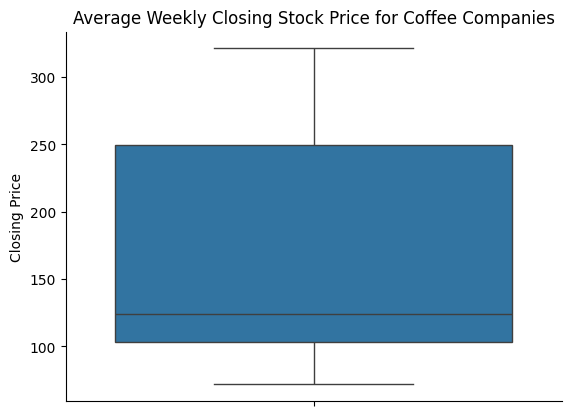

In [25]:
sns.boxplot(coffee['Closing Price']) 
plt.title("Average Weekly Closing Stock Price for Coffee Companies")
sns.despine()


<function matplotlib.pyplot.show(close=None, block=None)>

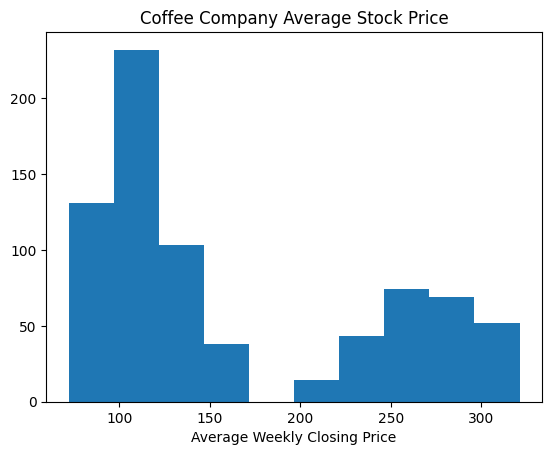

In [26]:
plt.hist(coffee['Closing Price'])
plt.title("Coffee Company Average Stock Price")
plt.xlabel("Average Weekly Closing Price")
plt.show